In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [123]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [124]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Asteroid_Updated.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0,10,15,16,23,24) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [125]:
df

,name,a,e,i,om,w,q,ad,per_y,data_arc,...,UB,IR,spec_B,spec_T,G,moid,class,n,per,ma
0,Ceres,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,...,0.426,NaN,C,G,0.12,1.594780,MBA,0.213885,1683.145708,77.372096
1,Pallas,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318.0,...,0.284,NaN,B,B,0.11,1.233240,MBA,0.213503,1686.155999,59.699133
2,Juno,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684.0,...,0.433,NaN,Sk,S,0.32,1.034540,MBA,0.226019,1592.787285,34.925016
3,Vesta,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288.0,...,0.492,NaN,V,V,0.32,1.139480,MBA,0.271609,1325.432765,95.861936
4,Astraea,2.574249,0.191095,5.366988,141.576605,358.687607,2.082324,3.066174,4.130323,63507.0,...,0.411,NaN,S,S,NaN,1.095890,MBA,0.238632,1508.600458,282.366289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839709,NaN,2.812945,0.664688,4.695700,183.310012,234.618352,0.943214,4.682676,4.717914,17298.0,...,NaN,NaN,NaN,NaN,NaN,0.032397,APO,0.208911,1723.217927,156.905910
839710,NaN,2.645238,0.259376,12.574937,1.620020,339.568072,1.959126,3.331350,4.302346,16.0,...,NaN,NaN,NaN,NaN,NaN,0.956145,MBA,0.229090,1571.431965,13.366251
839711,NaN,2.373137,0.202053,0.732484,176.499082,198.026527,1.893638,2.852636,3.655884,5.0,...,NaN,NaN,NaN,NaN,NaN,0.893896,MBA,0.269600,1335.311579,355.351127
839712,NaN,2.260404,0.258348,9.661947,204.512448,148.496988,1.676433,2.844376,3.398501,10.0,...,NaN,NaN,NaN,NaN,NaN,0.680220,MBA,0.290018,1241.302609,15.320134


In [126]:
df.isna().sum()

name              817747
a                      2
e                      0
i                      0
om                     0
w                      0
q                      0
ad                     6
per_y                  1
data_arc           15474
condition_code       867
n_obs_used             0
H                   2689
neo                    6
pha                16442
diameter          702078
extent            839696
albedo            703305
rot_per           820918
GM                839700
BV                838693
UB                838735
IR                839713
spec_B            838048
spec_T            838734
G                 839595
moid               16442
class                  0
n                      2
per                    6
ma                     8
dtype: int64

## Since we have to predict Diameter,
### For model formation :- droping the values with unknown diameter
### For Prediction :- the values with unknown diameter
#### On observing data diameter and albedo both are missing hence we have to drop albedo also.



In [127]:
df=df.dropna(subset=["diameter"])

In [128]:
df=df.dropna(subset=["albedo"])

In [129]:
df.isna().sum()

name              121302
a                      0
e                      0
i                      0
om                     0
w                      0
q                      0
ad                     0
per_y                  0
data_arc             129
condition_code         0
n_obs_used             0
H                    273
neo                    0
pha                    0
diameter               0
extent            136394
albedo                 0
rot_per           125252
GM                136394
BV                135408
UB                135448
IR                136405
spec_B            135048
spec_T            135448
G                 136289
moid                   0
class                  0
n                      0
per                    0
ma                     0
dtype: int64

In [130]:
len(df)

136406

In [131]:
df.columns

Index(['name', 'a', 'e', 'i', 'om', 'w', 'q', 'ad', 'per_y', 'data_arc',
       'condition_code', 'n_obs_used', 'H', 'neo', 'pha', 'diameter', 'extent',
       'albedo', 'rot_per', 'GM', 'BV', 'UB', 'IR', 'spec_B', 'spec_T', 'G',
       'moid', 'class', 'n', 'per', 'ma'],
      dtype='object')

#### Since columns-'extent',  'rot_per', 'GM', 'BV', 'UB', 'IR', 'spec_B', 'spec_T', 'G' has more than 100k missing values hence droping them

In [132]:
df=df.drop(['extent','rot_per', 'GM', 'BV', 'UB', 'IR', 'spec_B', 'spec_T', 'G'],axis=1)

In [133]:
df.isna().sum()

name              121302
a                      0
e                      0
i                      0
om                     0
w                      0
q                      0
ad                     0
per_y                  0
data_arc             129
condition_code         0
n_obs_used             0
H                    273
neo                    0
pha                    0
diameter               0
albedo                 0
moid                   0
class                  0
n                      0
per                    0
ma                     0
dtype: int64

In [134]:
len(df)

136406

### 130k is large hence droping values with NAN in "data_arc","H"

In [135]:
df=df.dropna(subset=["data_arc","H"])

In [136]:
df.head()

,name,a,e,i,om,w,q,ad,per_y,data_arc,...,H,neo,pha,diameter,albedo,moid,class,n,per,ma
0,Ceres,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,...,3.34,N,N,939.4,0.0900,1.59478,MBA,0.213885,1683.145708,77.372096
1,Pallas,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318.0,...,4.13,N,N,545,0.1010,1.23324,MBA,0.213503,1686.155999,59.699133
2,Juno,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684.0,...,5.33,N,N,246.596,0.2140,1.03454,MBA,0.226019,1592.787285,34.925016
3,Vesta,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288.0,...,3.20,N,N,525.4,0.4228,1.13948,MBA,0.271609,1325.432765,95.861936
4,Astraea,2.574249,0.191095,5.366988,141.576605,358.687607,2.082324,3.066174,4.130323,63507.0,...,6.85,N,N,106.699,0.2740,1.09589,MBA,0.238632,1508.600458,282.366289


In [137]:
df.describe()

,a,e,i,om,w,q,ad,per_y,data_arc,n_obs_used,H,albedo,moid,n,per,ma
count,136005.000000,136005.000000,136005.000000,136005.000000,136005.000000,136005.000000,136005.000000,136005.000000,136005.000000,136005.000000,136005.000000,136005.000000,136005.000000,136005.000000,1.360050e+05,136005.000000
mean,2.815693,0.145313,10.282281,169.807486,181.836278,2.403970,3.227416,4.888298,9038.231322,682.142436,15.168089,0.130239,1.421260,0.219453,1.785451e+03,183.059375
std,1.530973,0.077182,6.787443,102.719643,103.549080,0.516701,2.912808,25.684872,6152.748606,595.352159,1.404894,0.110096,0.512976,0.056268,9.381399e+03,103.311876
min,0.626226,0.000489,0.021855,0.000738,0.004466,0.081882,0.999956,0.495569,1.000000,5.000000,3.200000,0.001000,0.000166,0.000128,1.810067e+02,0.000517
25%,2.537771,0.089642,5.086016,82.280385,91.854209,2.069771,2.865559,4.042843,6317.000000,222.000000,14.400000,0.053000,1.083150,0.181237,1.476648e+03,94.382492
50%,2.751052,0.138445,9.333112,160.495337,183.544850,2.364667,3.167517,4.563063,7593.000000,505.000000,15.300000,0.079000,1.385500,0.216001,1.666659e+03,186.758091
75%,3.092468,0.190912,13.660185,256.133089,271.650499,2.686388,3.467761,5.438335,9774.000000,992.000000,16.100000,0.189000,1.699980,0.243795,1.986352e+03,271.324734
max,389.145964,0.984348,170.323647,359.990858,359.995174,40.465671,772.201080,7676.742943,72684.000000,9325.000000,27.500000,1.000000,39.507000,1.988877,2.803930e+06,359.999979


In [138]:
df.dtypes

name               object
a                 float64
e                 float64
i                 float64
om                float64
w                 float64
q                 float64
ad                float64
per_y             float64
data_arc          float64
condition_code     object
n_obs_used          int64
H                 float64
neo                object
pha                object
diameter           object
albedo            float64
moid              float64
class              object
n                 float64
per               float64
ma                float64
dtype: object

### Droping "name"

In [139]:
df=df.drop("name",axis=1)

In [140]:
df.nunique()

a                 136005
e                 136005
i                 136005
om                136005
w                 136005
q                 136005
ad                136005
per_y             136005
data_arc           18546
condition_code        20
n_obs_used          3129
H                    715
neo                    2
pha                    2
diameter           24443
albedo              1057
moid               94012
class                 11
n                 136005
per               136005
ma                136005
dtype: int64

In [141]:
df.pha.unique()

array(['N', 'Y'], dtype=object)

In [142]:
df["pha"]=df["pha"].replace({"N":0,"Y":1})

In [143]:
df.neo.unique()

array(['N', 'Y'], dtype=object)

In [144]:
df["neo"]=df["neo"].replace({"N":0,"Y":1})

In [145]:
df["class"].unique()

array(['MBA', 'OMB', 'MCA', 'AMO', 'IMB', 'TJN', 'CEN', 'APO', 'ATE',
       'AST', 'TNO'], dtype=object)

In [146]:
df["condition_code"].unique()

array([0, 1, 3, 2, '0', '1', '2', '4', '5', '9', '3', '7', 5.0, 6.0, 4.0,
       7.0, 9.0, 8.0, '8', '6'], dtype=object)

In [147]:
df["condition_code"]=df["condition_code"].astype(int)

In [148]:
df.dtypes

a                 float64
e                 float64
i                 float64
om                float64
w                 float64
q                 float64
ad                float64
per_y             float64
data_arc          float64
condition_code      int64
n_obs_used          int64
H                 float64
neo                 int64
pha                 int64
diameter           object
albedo            float64
moid              float64
class              object
n                 float64
per               float64
ma                float64
dtype: object

#### Here diameter is in Object type , changing it to float64

In [149]:
df["diameter"]=df["diameter"].astype(float)

In [150]:
df['class'].value_counts()

MBA    124971
OMB      7394
TJN      1873
IMB       564
APO       454
MCA       336
AMO       255
ATE        91
CEN        48
TNO        13
AST         6
Name: class, dtype: int64

#### here for class, mapping it with numerical value inversely to its density i.e lessor for MBA 

In [151]:
df["class"]=df["class"].replace({'MBA':1, 'OMB':65, 'MCA':10, 'AMO':75, 'IMB':70, 'TJN':20, 'CEN':80, 'APO':85, 'ATE':90,
       'AST':95, 'TNO':100})

In [152]:
df.dtypes

a                 float64
e                 float64
i                 float64
om                float64
w                 float64
q                 float64
ad                float64
per_y             float64
data_arc          float64
condition_code      int64
n_obs_used          int64
H                 float64
neo                 int64
pha                 int64
diameter          float64
albedo            float64
moid              float64
class               int64
n                 float64
per               float64
ma                float64
dtype: object

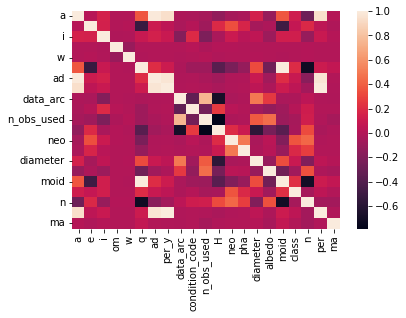

In [153]:
sns.heatmap(df.corr())

#### Box plots for q,data_arc,n_obs_used,H,moid,n

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


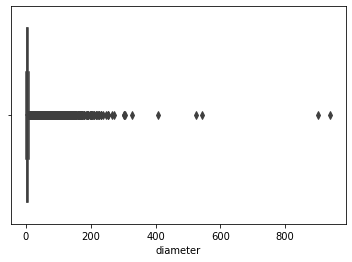

In [154]:
sns.boxplot(df["diameter"]);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


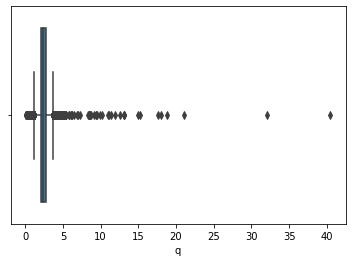

In [155]:
sns.boxplot(df["q"]);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


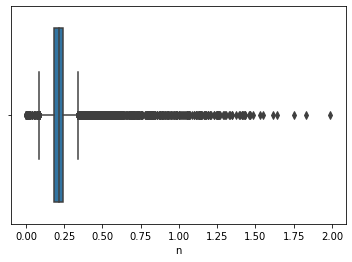

In [156]:
sns.boxplot(df["n"]);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


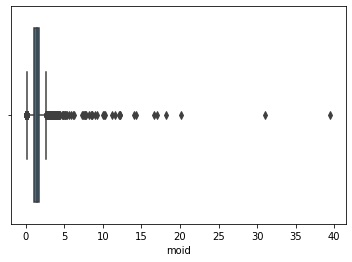

In [157]:
sns.boxplot(df["moid"]);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


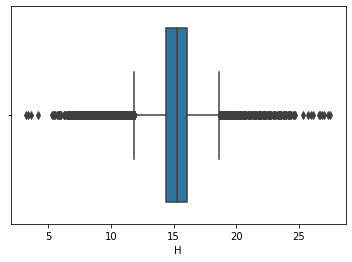

In [158]:
sns.boxplot(df["H"]);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


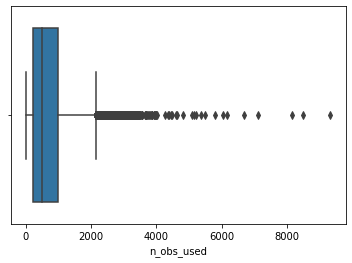

In [159]:
sns.boxplot(df["n_obs_used"]);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


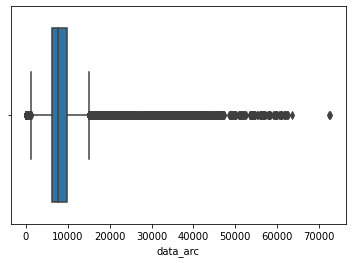

In [160]:
sns.boxplot(df["data_arc"]);

#### Removing outliers

In [161]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [162]:
u_l=df["moid"].quantile(0.98)
l_l=df["moid"].quantile(0.001)

In [163]:
u_l,l_l

(2.228143599999999, 0.022738374399999997)

In [164]:
df["moid"]=np.where(df["moid"]>u_l,u_l,df["moid"])
df["moid"]=np.where(df["moid"]<l_l,l_l,df["moid"])

In [165]:
u_l=df["diameter"].quantile(0.98)
l_l=df["diameter"].quantile(0.001)

In [166]:
u_l,l_l

(19.831679999999935, 0.251004)

In [167]:
df["diameter"]=np.where(df["diameter"]>u_l,u_l,df["diameter"])
df["diameter"]=np.where(df["diameter"]<l_l,l_l,df["diameter"])

In [168]:
u_l=df["q"].quantile(0.99)
l_l=df["q"].quantile(0.001)

In [169]:
u_l,l_l

(4.725828926713085, 0.5634329087003002)

In [170]:
df["q"]=np.where(df["q"]>u_l,u_l,df["q"])
df["q"]=np.where(df["q"]<l_l,l_l,df["q"])

In [171]:
df.corr()["diameter"].sort_values()

H                -0.795367
n                -0.415110
albedo           -0.222304
condition_code   -0.155115
e                -0.118750
neo              -0.082307
pha              -0.044200
om                0.000551
w                 0.002207
ma                0.023978
per_y             0.047626
per               0.047626
i                 0.099684
ad                0.111940
class             0.168614
a                 0.187234
moid              0.433449
q                 0.495942
n_obs_used        0.535958
data_arc          0.545872
diameter          1.000000
Name: diameter, dtype: float64

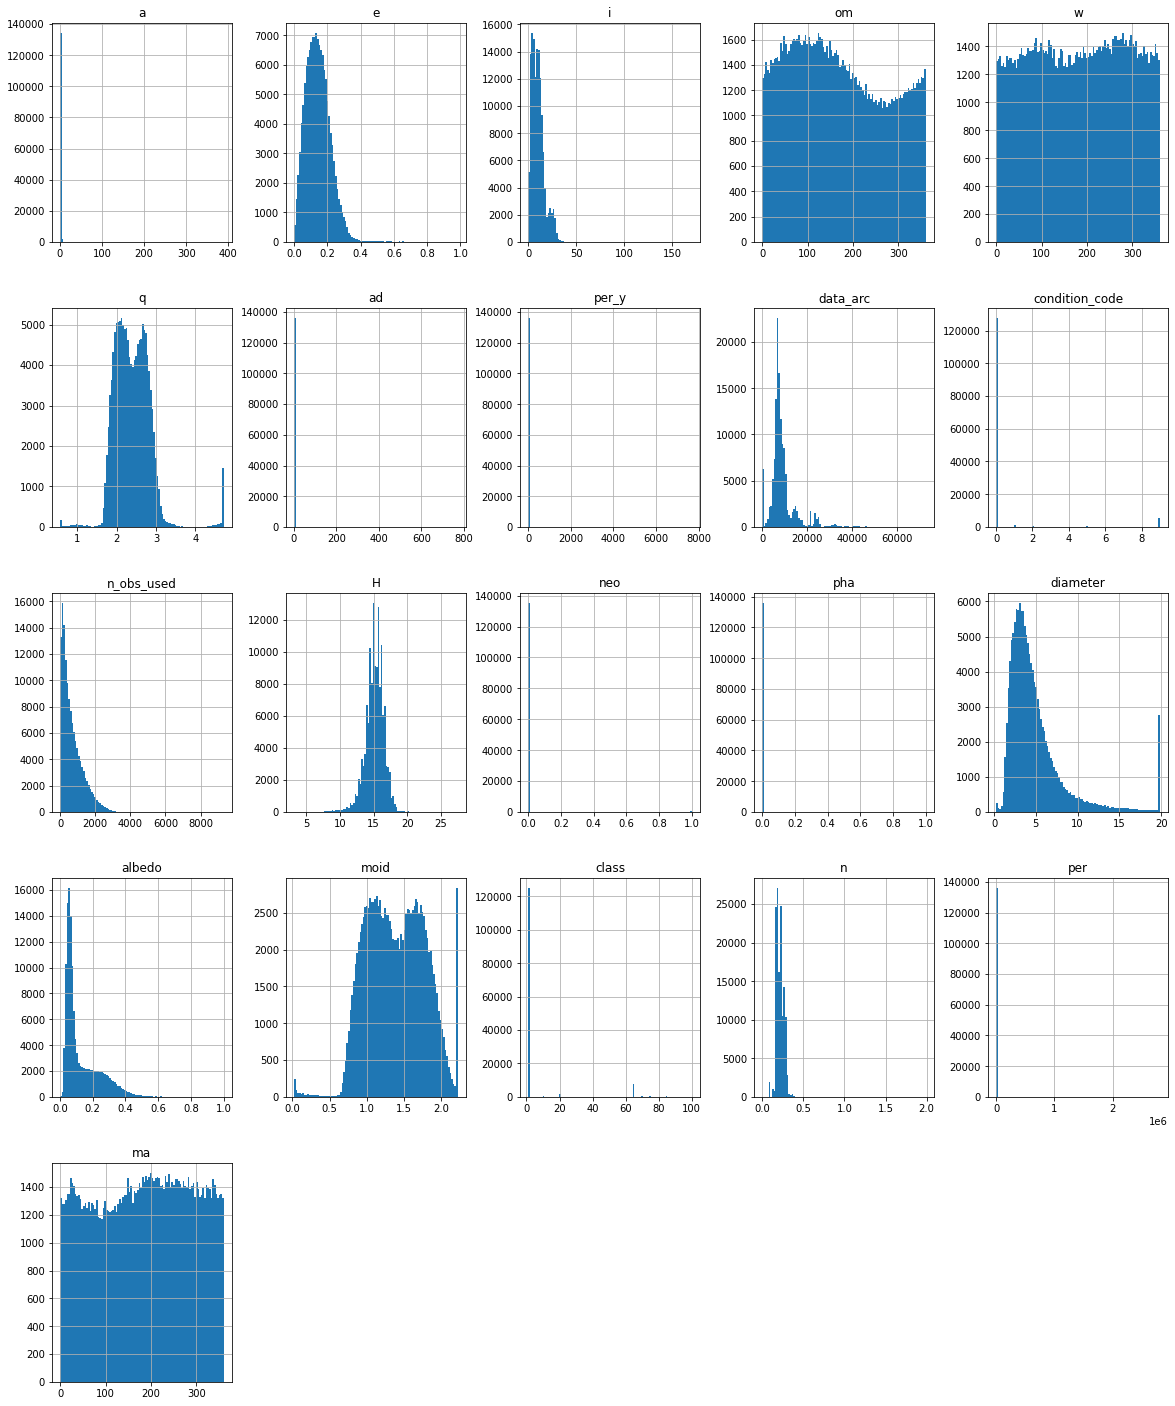

In [172]:
df.hist(bins=100,figsize=(20,25));

In [173]:
df.corr()["diameter"].sort_values()

H                -0.795367
n                -0.415110
albedo           -0.222304
condition_code   -0.155115
e                -0.118750
neo              -0.082307
pha              -0.044200
om                0.000551
w                 0.002207
ma                0.023978
per_y             0.047626
per               0.047626
i                 0.099684
ad                0.111940
class             0.168614
a                 0.187234
moid              0.433449
q                 0.495942
n_obs_used        0.535958
data_arc          0.545872
diameter          1.000000
Name: diameter, dtype: float64

In [174]:
X=df.drop("diameter",axis=1)
y=df["diameter"]

In [175]:
from sklearn.model_selection import train_test_split

In [176]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [177]:
X_train.head()

,a,e,i,om,w,q,ad,per_y,data_arc,condition_code,n_obs_used,H,neo,pha,albedo,moid,class,n,per,ma
471187,3.170747,0.203536,13.710388,347.919366,336.848609,2.525385,3.816108,5.646126,6180.0,0,85,16.1,0,0,0.063,1.51960,1,0.174567,2062.247386,217.769946
247346,3.031845,0.231545,20.605970,273.096050,75.307478,2.329838,3.733852,5.279207,6335.0,0,251,15.1,0,0,0.051,1.41610,1,0.186700,1928.230405,138.490938
33602,2.595280,0.021687,5.978414,132.706923,179.712797,2.538996,2.651564,4.181042,8234.0,0,1306,14.6,0,0,0.259,1.52372,1,0.235737,1527.125420,205.795116
369286,2.638701,0.086901,4.458755,195.555559,174.417070,2.409396,2.868007,4.286408,4829.0,0,176,17.3,0,0,0.046,1.40798,1,0.229942,1565.610668,95.144872
622922,2.547423,0.091587,25.840409,186.619835,210.929482,2.314112,2.780733,4.065928,2.0,9,16,15.8,0,0,0.089,1.33159,1,0.242411,1485.080224,42.970174


In [178]:
from sklearn.metrics import explained_variance_score,mean_absolute_error,r2_score

In [179]:
from time import time
import catboost as cb
import lightgbm
from lightgbm import LGBMRegressor
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [201]:
regressors = [
    KNeighborsRegressor(),
    GradientBoostingRegressor(),
    ExtraTreesRegressor(),
    LGBMRegressor(boosting_type='gbdt', num_leaves=100, max_depth=-1, learning_rate=0.015, n_estimators=1000),
    RandomForestRegressor(),
    DecisionTreeRegressor(),
    LinearRegression(),
    Lasso(),
    Ridge(),
    cb.CatBoostRegressor()
]

In [190]:
 for model in regressors[:10]:
    start = time()
    model.fit(X_train, y_train)
    train_time = time() - start
    start = time()
    y_pred = model.predict(X_test)
    predict_time = time()-start    
    print(model)
    print("\tTraining time: %0.3fs" % train_time)
    print("\tPrediction time: %0.3fs" % predict_time)
    print("\tExplained variance:", explained_variance_score(y_test, y_pred))
    print("\tMean absolute error:", mean_absolute_error(y_test, y_pred))
    print("\tR2 score:", r2_score(y_test, y_pred))
    print()

KNeighborsRegressor()
	Training time: 0.011s
	Prediction time: 57.463s
	Explained variance: 0.7866126467885286
	Mean absolute error: 1.0957618280210282
	R2 score: 0.7864526428400337

GradientBoostingRegressor()
	Training time: 76.069s
	Prediction time: 0.055s
	Explained variance: 0.9759308295122756
	Mean absolute error: 0.34583393918741684
	R2 score: 0.9759306606812013

ExtraTreesRegressor()
	Training time: 63.438s
	Prediction time: 1.576s
	Explained variance: 0.9785269812225879
	Mean absolute error: 0.314567918401529
	R2 score: 0.9785269599602797

LGBMRegressor(learning_rate=0.15, n_estimators=1000, num_leaves=100)
	Training time: 13.685s
	Prediction time: 1.695s
	Explained variance: 0.9792972300252514
	Mean absolute error: 0.3127755494471274
	R2 score: 0.9792972013176904

RandomForestRegressor()
	Training time: 206.405s
	Prediction time: 1.352s
	Explained variance: 0.9781864251952149
	Mean absolute error: 0.31538580912319436
	R2 score: 0.978186416804274

DecisionTreeRegressor()
	Trai

On GridSearch score is almost same
### Now using MLP (multilayer perceptron)

In [191]:
from sklearn.neural_network import MLPRegressor

In [192]:
model6=MLPRegressor(max_iter=1000,warm_start=True,
    activation='tanh')
model6.fit(X_train,y_train)

MLPRegressor(activation='tanh', max_iter=1000, warm_start=True)

In [193]:
model6.score(X_test,y_test)

0.5910605694497171

## Without Albedo 

In [194]:
df2=df.drop("albedo",axis=1)

In [195]:
X2=df2.drop("diameter",axis=1)
y2=df2["diameter"]

In [196]:
X2_train,X2_test,y2_train,y2_test=train_test_split(X2,y2,test_size=0.2)

In [202]:
for model in regressors[:10]:
    start = time()
    model.fit(X2_train, y2_train)
    train_time = time() - start
    start = time()
    y2_pred = model.predict(X2_test)
    predict_time = time()-start    
    print(model)
    print("\tTraining time: %0.3fs" % train_time)
    print("\tPrediction time: %0.3fs" % predict_time)
    print("\tExplained variance:", explained_variance_score(y2_test, y2_pred))
    print("\tMean absolute error:", mean_absolute_error(y2_test, y2_pred))
    print("\tR2 score:", r2_score(y2_test, y2_pred))
    print()

KNeighborsRegressor()
	Training time: 0.015s
	Prediction time: 61.284s
	Explained variance: 0.7830804519366594
	Mean absolute error: 1.095030580111025
	R2 score: 0.7829881920818307

GradientBoostingRegressor()
	Training time: 73.547s
	Prediction time: 0.050s
	Explained variance: 0.8626526635370586
	Mean absolute error: 0.9157471979741386
	R2 score: 0.862648371512196

ExtraTreesRegressor()
	Training time: 61.482s
	Prediction time: 1.644s
	Explained variance: 0.87998388910369
	Mean absolute error: 0.8134184900731586
	R2 score: 0.8799523178185371

LGBMRegressor(learning_rate=0.015, n_estimators=10000, num_leaves=100)
	Training time: 131.216s
	Prediction time: 22.942s
	Explained variance: 0.8879540652038415
	Mean absolute error: 0.7758519454226577
	R2 score: 0.8879518765675564

RandomForestRegressor()
	Training time: 218.871s
	Prediction time: 1.525s
	Explained variance: 0.8808019199590884
	Mean absolute error: 0.8059754500716886
	R2 score: 0.880765250324331

DecisionTreeRegressor()
	Train